In [23]:
import pandas as pd
import numpy as np
import re
import string
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df = pd.read_csv('../Data/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

In [6]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.isna().sum()

label    0
text     0
dtype: int64

In [9]:
encoder = LabelEncoder()
df['Spam'] = encoder.fit_transform(df['label'])

# df['Spam'] = df['label'].apply(lambda x:1 if x == 'spam' else 0)

df.head()

,label,text,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([char if char not in string.punctuation else "" for char in text])
    # Remove numbers
    text = "".join([char if not char.isdigit() else " " for char in text])
    # Remove extra whitespace
    text = " ".join(text.split())
    
    return text


df['processed_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,Spam,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...


EDA 

In [11]:
values = df['Spam'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)


percentage of 0 : 86.59368269921033
percentage of 1 : 13.406317300789663


/tmp/ipykernel_69524/1176476710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


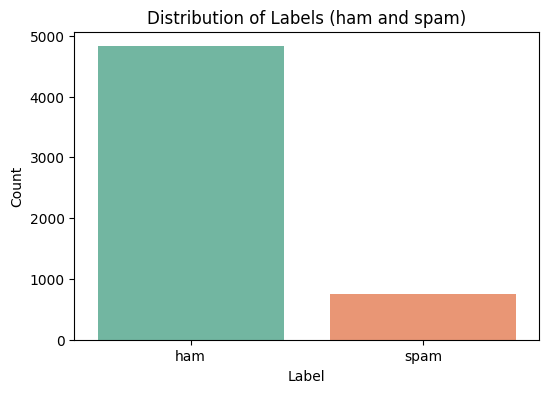

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Distribution of Labels (ham and spam)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Split data

In [13]:
X_train,X_test,y_train,y_test=train_test_split(df.processed_text ,df.Spam ,test_size=0.25)

Evaluate

In [40]:
def model_evaluate(model):
    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print classification report
    report = classification_report(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Naive Bayes


In [35]:
Naive_bayes_model = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [36]:
Naive_bayes_model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [39]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

Naive_bayes_model.predict(emails)

array([0, 1])

Accuracy: 0.9770279971284996
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1184
           1       0.98      0.87      0.92       209

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



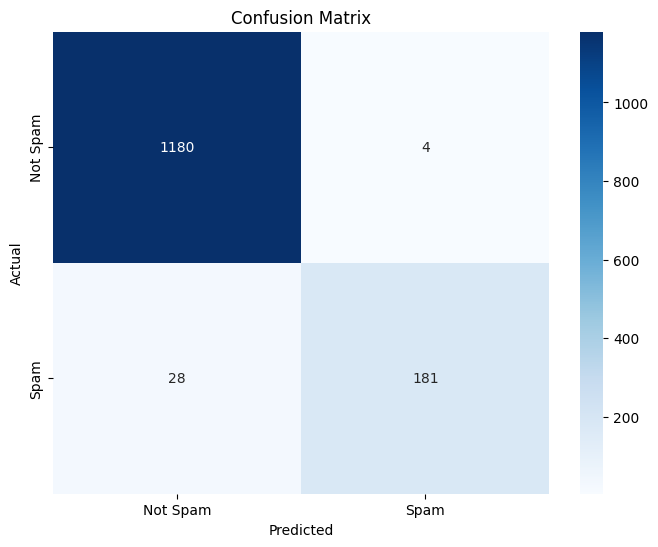

In [41]:

model_evaluate(Naive_bayes_model)

SVM

In [55]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer

svm_model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('svm', svm.SVC(probability=True))
])


svm_model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('svm', SVC(probability=True))])

Accuracy: 0.9698492462311558
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1184
           1       1.00      0.80      0.89       209

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



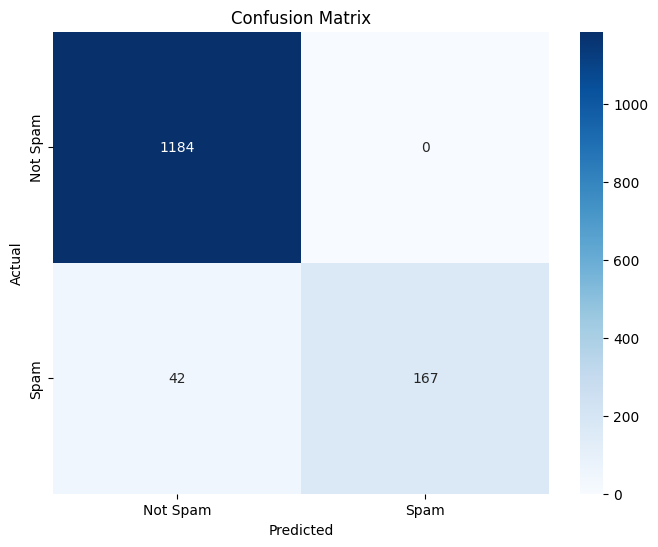

In [56]:
model_evaluate(svm_model)

Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('rfc', RandomForestClassifier(n_estimators=100))
])

rfc_model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('rfc', RandomForestClassifier())])

Accuracy: 0.9612347451543432
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1184
           1       1.00      0.74      0.85       209

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.96      0.96      0.96      1393



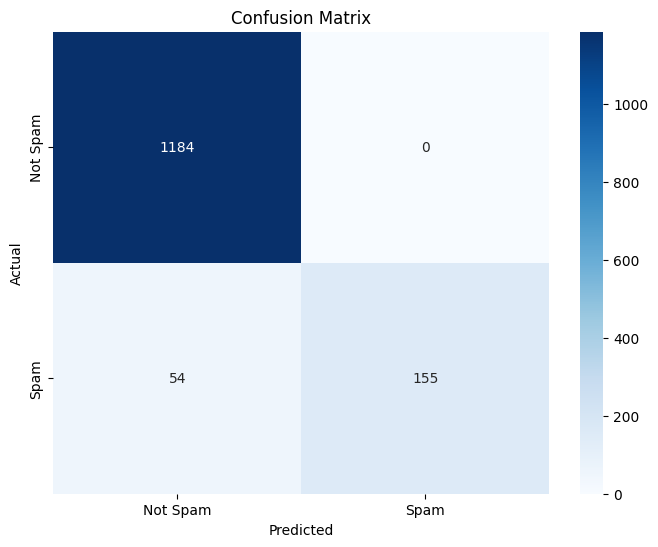

In [50]:
model_evaluate(rfc_model)

Ensemble learning

In [57]:
from sklearn.ensemble import VotingClassifier


ensemble_model = VotingClassifier(estimators=[
    ('naive_bayes', Naive_bayes_model),
    ('svm', svm_model),
    ('random_forest', rfc_model)
], voting='hard')

ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('naive_bayes',
                              Pipeline(steps=[('vectorizer', CountVectorizer()),
                                              ('nb', MultinomialNB())])),
                             ('svm',
                              Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                              ('svm', SVC(probability=True))])),
                             ('random_forest',
                              Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                              ('rfc',
                                               RandomForestClassifier())]))])

Accuracy: 0.9698492462311558
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1184
           1       1.00      0.80      0.89       209

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



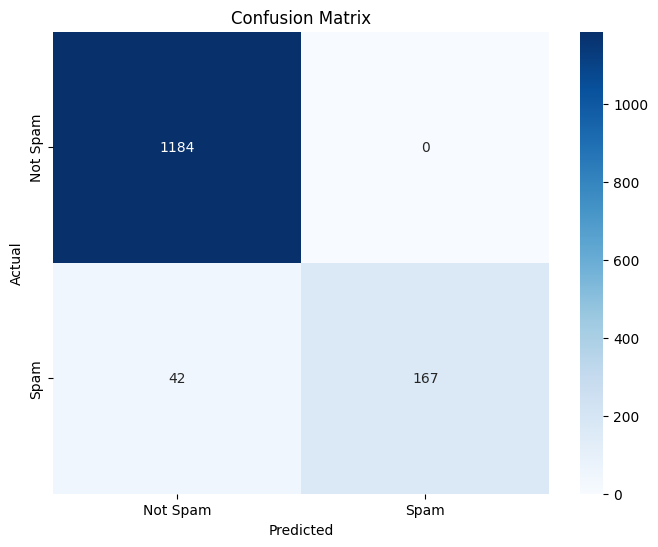

In [58]:
model_evaluate(ensemble_model)

Stacking model

In [61]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('naive_bayes', Naive_bayes_model),
    ('svm', svm_model),
    ('random_forest', rfc_model)
]

meta_learner = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('naive_bayes',
                                Pipeline(steps=[('vectorizer',
                                                 CountVectorizer()),
                                                ('nb', MultinomialNB())])),
                               ('svm',
                                Pipeline(steps=[('vectorizer',
                                                 TfidfVectorizer()),
                                                ('svm',
                                                 SVC(probability=True))])),
                               ('random_forest',
                                Pipeline(steps=[('vectorizer',
                                                 TfidfVectorizer()),
                                                ('rfc',
                                                 RandomForestClassifier())]))],
                   final_estimator=LogisticRegression())

Accuracy: 0.9770279971284996
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1184
           1       0.99      0.86      0.92       209

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



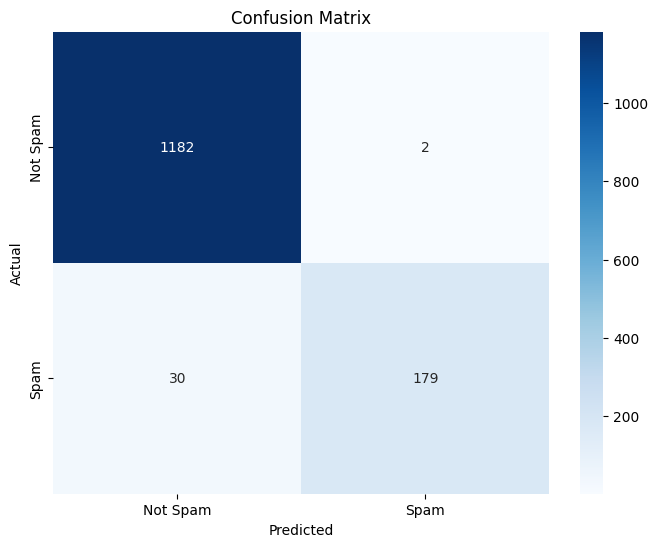

In [62]:
model_evaluate(stacking_model)

Export models

In [69]:
import joblib

def export_model(model, model_name):
    """
    Exports a model to a .pkl file.
    
    Parameters:
    model: The model to be exported.
    model_name: The name of the model to be used in the file name.
    """
    filename = f"../models/{model_name}.pkl"
    joblib.dump(model, filename)
    print(f"{model_name} has been exported as {filename}")

# List of models and their names
models = {
    'stacking_model': stacking_model,
    'ensemble_model': ensemble_model,
    'Naive_bayes_model': Naive_bayes_model,
    'svm_model': svm_model,
    'rfc_model': rfc_model
}

# Export each model
for model_name, model in models.items():
    export_model(model, model_name)


stacking_model has been exported as ../models/stacking_model.pkl
ensemble_model has been exported as ../models/ensemble_model.pkl
Naive_bayes_model has been exported as ../models/Naive_bayes_model.pkl
svm_model has been exported as ../models/svm_model.pkl
rfc_model has been exported as ../models/rfc_model.pkl
